## Decision Tree Classifier Implementation With Post Prunning And Preprunning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\inare\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\inare\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


This code snippet imports the necessary libraries for data manipulation, numerical operations, and visualization in Python. Here's what each line does:

```python
import pandas as pd
```
- Imports the pandas library and assigns it the alias `pd`. Pandas is a powerful library for data manipulation and analysis in Python, providing data structures and functions to efficiently work with structured data.

```python
import numpy as np
```
- Imports the NumPy library and assigns it the alias `np`. NumPy is a fundamental package for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

```python
import matplotlib.pyplot as plt
```
- Imports the pyplot module from the Matplotlib library and assigns it the alias `plt`. Matplotlib is a widely used plotting library in Python that enables the creation of various types of plots, including line plots, scatter plots, histograms, and more.

```python
%matplotlib inline
```
- This is a special command used in Jupyter Notebook and JupyterLab environments to display Matplotlib plots directly within the notebook interface. It ensures that plots are rendered inline, meaning they will appear directly below the code cell that generates them.

By importing these libraries, you gain access to powerful tools for data analysis, manipulation, and visualization, which are essential for working with data in Python.

In [2]:
from sklearn.datasets import load_iris

The code snippet provided imports the `load_iris` function from the `sklearn.datasets` module. This function is used to load the famous Iris dataset, which is a classic dataset in machine learning and statistics. Here's how you can use it:

```python
from sklearn.datasets import load_iris
```

Explanation:
- `load_iris` is a function provided by scikit-learn (`sklearn`) that loads the Iris dataset.
- The Iris dataset is a well-known dataset in the field of machine learning and statistics. It contains measurements for 150 iris flowers from three different species: Setosa, Versicolor, and Virginica. For each flower, four features are measured: sepal length, sepal width, petal length, and petal width.
- When you call `load_iris()`, it returns a dictionary-like object with the following attributes:
  - `data`: Array-like object with the feature data for the dataset.
  - `target`: Array-like object with the target labels.
  - `target_names`: Names of the target classes.
  - `feature_names`: Names of the features.
  - `DESCR`: Description of the dataset.
  
After loading the dataset using `load_iris()`, you can access its attributes to perform various analyses or use it for machine learning tasks, such as classification or clustering.

In [3]:
dataset=load_iris()

The code `dataset = load_iris()` loads the Iris dataset using the `load_iris()` function from scikit-learn's `datasets` module. It typically returns a dictionary-like object containing the data, target labels, feature names, target names, and a description of the dataset. Here's how you can use it:

```python
from sklearn.datasets import load_iris

# Load the Iris dataset
dataset = load_iris()
```

After loading the dataset, you can access its attributes like this:

- `dataset.data`: Array-like object containing the feature data for the dataset.
- `dataset.target`: Array-like object containing the target labels.
- `dataset.target_names`: Names of the target classes.
- `dataset.feature_names`: Names of the features.
- `dataset.DESCR`: Description of the dataset.

These attributes allow you to explore and analyze the Iris dataset, which is commonly used for classification, clustering, and other machine learning tasks.

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The `DESCR` attribute of the Iris dataset contains a description of the dataset. Here's how you can print it:

```python
print(dataset.DESCR)
```

This code will output a detailed description of the Iris dataset, including information about the number of instances, the number of features, the classes, and other relevant details about the dataset's structure and origin.

In [5]:
import seaborn as sns
df=sns.load_dataset('iris')

The code provided loads the Iris dataset using the `load_dataset` function from the Seaborn library (`sns`). The Iris dataset is a built-in dataset in Seaborn, and loading it this way creates a pandas DataFrame containing the dataset. Here's how you can use it:

```python
import seaborn as sns

# Load the Iris dataset into a DataFrame
df = sns.load_dataset('iris')
```

After loading the dataset, `df` will be a pandas DataFrame containing the Iris dataset, which includes columns such as sepal length, sepal width, petal length, petal width, and species (target variable). You can use this DataFrame for data analysis, visualization, or machine learning tasks.

In [6]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

When you load the Iris dataset using scikit-learn's `load_iris()` function, the `target` attribute contains the target labels corresponding to each sample in the dataset. These labels indicate the species of iris for each sample.

To access the target labels, you can use `dataset.target`. Here's how you can do it:

```python
target_labels = dataset.target
```

After executing this code, `target_labels` will be an array-like object containing the target labels for each sample in the Iris dataset. Each label corresponds to a specific species of iris:

- 0: Setosa
- 1: Versicolor
- 2: Virginica

You can use these labels for various classification or clustering tasks, as well as for analyzing the distribution of different iris species in the dataset.

In [7]:
#Independent and dependent features
X=df.iloc[:,:-1]
y=dataset.target

The code provided separates the independent features (X) and the dependent feature (y) from the Iris dataset.

Here's what each part does:

```python
# Independent features (X): Contains all columns except the last one (which is the target variable)
X = df.iloc[:, :-1]

# Dependent feature (y): Contains the target variable
y = dataset.target
```

Explanation:

- `X`: This variable contains all the columns of the DataFrame `df` except for the last one. In the context of the Iris dataset, these columns represent the features such as sepal length, sepal width, petal length, and petal width.
  
- `y`: This variable contains the target variable from the Iris dataset, which represents the species of iris (the dependent variable). It corresponds to the target labels loaded from `dataset.target`.

By separating the independent and dependent features, you are preparing the data for training machine learning models. `X` will be used as the input to predict the target variable `y`. This is a common step in supervised learning tasks where you have both features and their corresponding labels.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

The code provided performs train-test splitting using scikit-learn's `train_test_split` function. This function splits the dataset into training and testing sets, allowing you to evaluate the performance of your machine learning model on unseen data.

Here's what each part of the code does:

```python
from sklearn.model_selection import train_test_split
```
- Imports the `train_test_split` function from scikit-learn's `model_selection` module, which is used to split datasets into random train and test subsets.

```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
```
- Splits the independent features (`X`) and the dependent feature (`y`) into training and testing sets.
- `X_train` and `y_train` represent the training data and labels, while `X_test` and `y_test` represent the testing data and labels, respectively.
- The `test_size` parameter specifies the proportion of the dataset to include in the test split. In this case, it's set to 0.33, meaning that 33% of the data will be used for testing, and 67% will be used for training.
- The `random_state` parameter sets the seed for the random number generator, ensuring reproducibility of the split. It's set to 42 in this example, but you can use any integer value.

After executing this code, you'll have four datasets ready for training and testing your machine learning model: `X_train`, `X_test`, `y_train`, and `y_test`.

In [9]:
from sklearn.tree import DecisionTreeClassifier

The code provided imports the `DecisionTreeClassifier` class from scikit-learn's tree module. The `DecisionTreeClassifier` is a popular machine learning model for classification tasks based on decision tree algorithms.

Here's the code:

```python
from sklearn.tree import DecisionTreeClassifier
```

Explanation:
- `from sklearn.tree` imports the decision tree-related functionalities from scikit-learn.
- `DecisionTreeClassifier` is a class in scikit-learn used for classification tasks. It implements decision tree algorithms to learn from the data and make predictions.

After importing `DecisionTreeClassifier`, you can create an instance of this classifier and train it on your training data (`X_train` and `y_train`) using the `fit` method. Then, you can use the trained model to make predictions on new data and evaluate its performance.

In [10]:
classifier=DecisionTreeClassifier(criterion='entropy')

The code snippet provided creates an instance of the `DecisionTreeClassifier` class from scikit-learn with the criterion set to 'entropy'. Here's the breakdown:

```python
from sklearn.tree import DecisionTreeClassifier
```
- Imports the `DecisionTreeClassifier` class from scikit-learn's tree module.

```python
classifier = DecisionTreeClassifier(criterion='entropy')
```
- Creates an instance of the `DecisionTreeClassifier` class with the criterion parameter set to 'entropy'.
- The 'entropy' criterion measures the quality of a split by the information gain. It's one of the criteria used to measure the quality of a split in a decision tree. Other options include 'gini' for the Gini impurity.

After creating the `DecisionTreeClassifier` object, you can train it using your training data (`X_train` and `y_train`) and then use it to make predictions on new data. The criterion parameter specifies the function to measure the quality of a split in the decision tree.

In [11]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

The code `classifier.fit(X_train, y_train)` fits (trains) the `DecisionTreeClassifier` model on the training data (`X_train` and `y_train`). Here's what it does:

```python
classifier.fit(X_train, y_train)
```

Explanation:
- `classifier`: This is an instance of the `DecisionTreeClassifier` class that you previously created.
- `fit(X_train, y_train)`: This method is used to train the classifier using the training data. It takes two main parameters:
  - `X_train`: The feature matrix containing the independent variables used for training the model.
  - `y_train`: The target vector containing the dependent variable values corresponding to the training data.

When you call `fit()` on the `DecisionTreeClassifier` object with the training data, the model learns patterns and relationships in the data to make predictions. It constructs a decision tree based on the provided features and labels, using the specified criterion ('entropy' in this case) to make splits at each node.

After training, the `classifier` object is now ready to make predictions on new data using its `predict()` method.

In [ ]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


If you want to view the first few rows of the training data (`X_train`), you can use the `head()` method in pandas. Here's how you can do it:

```python
X_train.head()
```

This will display the first few rows of the DataFrame `X_train`, showing the feature values for the independent variables used for training the model. It helps you inspect the structure and content of the training data to ensure that it's properly formatted and contains the expected information.

[Text(0.4444444444444444, 0.9285714285714286, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.07142857142

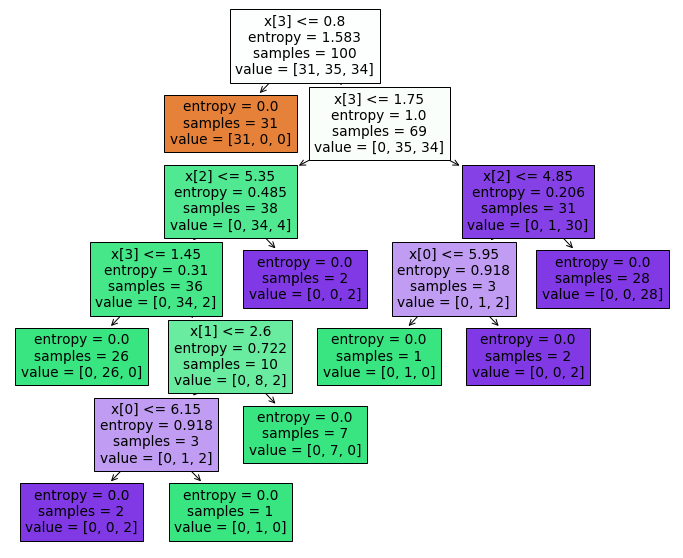

In [12]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

The code provided visualizes the decision tree classifier using Matplotlib. Here's what each part does:

```python
from sklearn import tree
```
- Imports the `tree` module from scikit-learn, which contains utilities for decision trees.

```python
plt.figure(figsize=(12, 10))
```
- Creates a new figure with a specific size using Matplotlib. This line sets the size of the figure to 12 inches in width and 10 inches in height.

```python
tree.plot_tree(classifier, filled=True)
```
- Generates a plot of the decision tree classifier (`classifier`) using the `plot_tree` function from scikit-learn's `tree` module.
- The `filled=True` parameter fills the decision tree nodes with colors representing the majority class.

After executing this code, you should see a visualization of the decision tree classifier with the specified size and filled nodes. This visualization helps in understanding how the decision tree makes decisions based on the features and splits in the data.

In [13]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

The code provided instantiates a `DecisionTreeClassifier` with post-pruning enabled, specifically limiting the maximum depth of the tree to 2. Here's what the code does:

```python
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=2)
```

- This creates a decision tree classifier with the criterion set to 'entropy', which measures the quality of splits, and restricts the maximum depth of the tree to 2 levels.

```python
classifier.fit(X_train, y_train)
```

- The classifier is then trained using the training data `X_train` and `y_train`.

Limiting the maximum depth of the tree to 2 is a form of post-pruning, which can help prevent overfitting by simplifying the decision rules in the tree. A shallower tree is less likely to capture noise or outliers in the training data, potentially leading to better generalization performance on unseen data. However, too much pruning may also result in underfitting, where the model is too simplistic to capture the underlying patterns in the data. The choice of the maximum depth should be tuned based on the specific dataset and problem at hand.

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

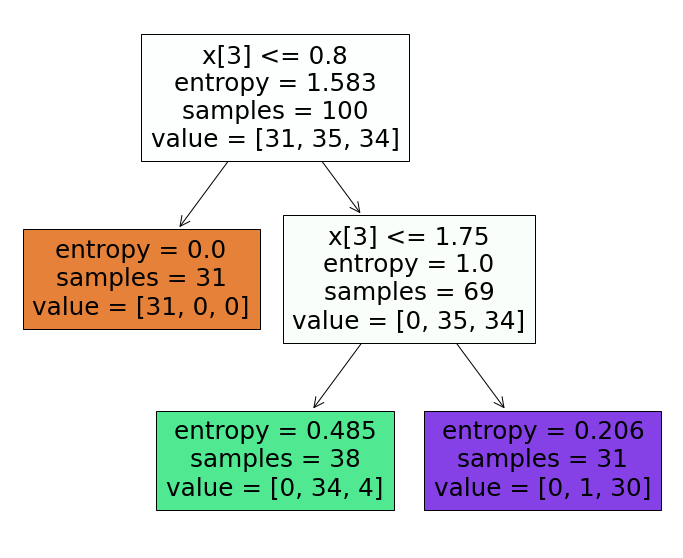

In [14]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

The provided code intends to visualize the decision tree classifier with post-pruning applied, limiting the maximum depth of the tree to 2. Here's a breakdown of the code:

```python
from sklearn import tree
```
- Imports the `tree` module from scikit-learn, which contains utilities for decision trees.

```python
plt.figure(figsize=(12, 10))
```
- Creates a new figure with a specific size using Matplotlib. This line sets the size of the figure to 12 inches in width and 10 inches in height.

```python
tree.plot_tree(classifier, filled=True)
```
- Generates a plot of the decision tree classifier (`classifier`) using the `plot_tree` function from scikit-learn's `tree` module.
- The `filled=True` parameter fills the decision tree nodes with colors representing the majority class.

After executing this code, you should see a visualization of the decision tree classifier with post-pruning applied, limiting the maximum depth of the tree to 2. This visualization provides insights into how the decision tree makes decisions based on the features and splits in the data, while also illustrating the effects of post-pruning on the tree structure.

In [15]:
y_pred=classifier.predict(X_test)

The provided code makes predictions on the test dataset (`X_test`) using the trained decision tree classifier (`classifier`). Here's what it does:

```python
y_pred = classifier.predict(X_test)
```

- `y_pred` stores the predicted labels for the test dataset, which is obtained by calling the `predict` method of the `classifier` object on the test features `X_test`.
- The decision tree classifier (`classifier`) has been trained previously using the training dataset (`X_train` and `y_train`), and now it's used to predict the labels for the test dataset.
- After executing this code, `y_pred` will contain the predicted labels for the test dataset based on the learned patterns from the training data.

You can then compare these predicted labels (`y_pred`) with the actual labels (`y_test`) to evaluate the performance of the decision tree classifier on unseen data. Common evaluation metrics include accuracy, precision, recall, F1-score, and confusion matrix.

In [16]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

The variable `y_pred` contains the predicted labels generated by the decision tree classifier for the test dataset (`X_test`). These predicted labels represent the classifier's predictions for the corresponding samples in the test dataset.

Here's how you can access `y_pred`:

```python
y_pred
```

When you print or inspect `y_pred`, you'll see an array or a list containing the predicted labels for the samples in the test dataset. Each element in the array corresponds to the predicted label for a specific sample in the test dataset, generated by the decision tree classifier. These predicted labels can be further used for evaluation, comparison with actual labels (`y_test`), or other analysis tasks.

In [17]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



The provided code calculates the accuracy score and generates a classification report based on the predicted labels (`y_pred`) and the true labels (`y_test`). Here's how it works:

```python
from sklearn.metrics import accuracy_score, classification_report
```

- Imports the `accuracy_score` and `classification_report` functions from scikit-learn's `metrics` module.

```python
score = accuracy_score(y_pred, y_test)
```

- Calculates the accuracy score by comparing the predicted labels (`y_pred`) with the true labels (`y_test`).

```python
print(score)
```

- Prints the accuracy score, which represents the proportion of correctly predicted labels among all the samples in the test dataset.

```python
print(classification_report(y_pred, y_test))
```

- Generates and prints a classification report, which includes precision, recall, F1-score, and support for each class, along with their averages.

The classification report provides detailed insights into the performance of the classifier for each class in the dataset. It's a useful tool for evaluating the precision, recall, and F1-score for each class, as well as for understanding the overall performance of the classifier.

## DecisionTree Prepruning And Hyperparameter Tuning For Huge Data

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

The `parameter` dictionary contains different hyperparameters for tuning a decision tree classifier. Here's a breakdown of each parameter:

- `criterion`: It defines the function to measure the quality of a split. Possible values are 'gini', 'entropy', and 'log_loss'.
- `splitter`: It specifies the strategy used to choose the split at each node. Options are 'best' and 'random'.
- `max_depth`: It determines the maximum depth of the tree. It can be an integer or None.
- `max_features`: It controls the number of features to consider when looking for the best split. Options include 'auto', 'sqrt', and 'log2'.

This parameter dictionary can be used with techniques like grid search or random search to find the optimal combination of hyperparameters for the decision tree classifier. By trying different combinations of hyperparameters from the specified ranges, you can fine-tune the model to achieve better performance on unseen data.

In [20]:
from sklearn.model_selection import GridSearchCV

The code snippet `from sklearn.model_selection import GridSearchCV` imports the `GridSearchCV` class from scikit-learn's `model_selection` module. 

Here's how you can use `GridSearchCV`:

```python
from sklearn.model_selection import GridSearchCV
```

This line imports the `GridSearchCV` class, which is a technique for tuning hyperparameters of an estimator using cross-validated grid search. GridSearchCV exhaustively considers all parameter combinations by evaluating each combination through cross-validation.

After importing `GridSearchCV`, you can instantiate an object of this class, passing the estimator (classifier), parameter grid, and other options as parameters. Then, you can fit this `GridSearchCV` object to your data, which will perform the grid search and cross-validation to find the best combination of hyperparameters for your classifier.

In [21]:
classifier=DecisionTreeClassifier()
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

The provided code sets up a GridSearchCV object to search for the best parameters for a DecisionTreeClassifier. Here's what each part does:

```python
classifier = DecisionTreeClassifier()
```
- Instantiates a DecisionTreeClassifier object without specifying any hyperparameters. It will use default hyperparameters.

```python
from sklearn.model_selection import GridSearchCV
```
- Imports the GridSearchCV class from scikit-learn's model_selection module.

```python
clf = GridSearchCV(classifier, param_grid=parameter, cv=5, scoring='accuracy')
```
- Creates a GridSearchCV object named clf:
  - `classifier`: The estimator (in this case, a DecisionTreeClassifier) to be tuned.
  - `param_grid`: The dictionary of hyperparameters to search over.
  - `cv`: The number of folds for cross-validation.
  - `scoring`: The scoring metric used to evaluate the model's performance (in this case, accuracy).

After setting up the GridSearchCV object, you can use the `fit` method to perform the grid search and cross-validation on your training data. The GridSearchCV object will try different combinations of hyperparameters from the parameter grid and select the combination that gives the best performance based on the specified scoring metric.

In [22]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

The `fit()` method of the `GridSearchCV` object (`clf`) fits the grid search cross-validation to find the best hyperparameters for the decision tree classifier using the provided training data (`X_train` and `y_train`). Here's what it does:

```python
clf.fit(X_train, y_train)
```

- This method starts the process of hyperparameter tuning using grid search cross-validation.
- It takes the training data (`X_train` and `y_train`) as input.
- During the fitting process, the `GridSearchCV` object (`clf`) iterates over all parameter combinations specified in the `param_grid` dictionary.
- For each combination, it performs cross-validation (with the number of folds specified by `cv`) to evaluate the performance of the model using the scoring metric (`accuracy` in this case).
- Once the fitting process is complete, the best hyperparameters are determined based on the highest mean cross-validated score.

After the fitting process, you can access various attributes of the `GridSearchCV` object, such as `best_params_` to see the best hyperparameters found during the grid search, and `best_score_` to see the corresponding best cross-validated score.

In [23]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

The attribute `best_params_` of the `GridSearchCV` object (`clf`) contains the best hyperparameters found during the grid search process. Here's how you can access it:

```python
clf.best_params_
```

When you execute this code, it will return a dictionary containing the best hyperparameters identified by the grid search. The keys of the dictionary correspond to the hyperparameter names, and the values are the best parameter values that yielded the highest cross-validated score during the grid search process.

You can use these best parameters to build your final model or further analyze the performance of the model with the optimized hyperparameters.

In [24]:
y_pred=clf.predict(X_test)

The code `y_pred = clf.predict(X_test)` is used to generate predictions on the test dataset (`X_test`) using the best estimator found by the GridSearchCV (`clf`). Here's what it does:

```python
y_pred = clf.predict(X_test)
```

- `y_pred` stores the predicted labels for the test dataset, which is obtained by calling the `predict` method of the best estimator (`clf`) on the test features `X_test`.
- The best estimator (`clf`) is the one that performed the best during the grid search cross-validation process, considering the specified scoring metric (accuracy).
- After executing this code, `y_pred` will contain the predicted labels for the test dataset based on the best hyperparameters found during the grid search. These predictions can be evaluated against the true labels (`y_test`) to assess the performance of the model on unseen data.

In [25]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



The provided code calculates the accuracy score and generates a classification report based on the predicted labels (`y_pred`) and the true labels (`y_test`). Here's what it does:

```python
from sklearn.metrics import accuracy_score, classification_report
```

- Imports the `accuracy_score` and `classification_report` functions from scikit-learn's `metrics` module.

```python
score = accuracy_score(y_pred, y_test)
```

- Calculates the accuracy score by comparing the predicted labels (`y_pred`) with the true labels (`y_test`).

```python
print(score)
```

- Prints the accuracy score, which represents the proportion of correctly predicted labels among all the samples in the test dataset.

```python
print(classification_report(y_pred, y_test))
```

- Generates and prints a classification report, which includes precision, recall, F1-score, and support for each class, along with their averages.

The classification report provides detailed insights into the performance of the classifier for each class in the dataset. It's a useful tool for evaluating the precision, recall, and F1-score for each class, as well as for understanding the overall performance of the classifier.